
# BEE 4310/6310: Environmental Statistics and Learning  <br> Assignment #1 (10 pts)

**Include responses to everything below in bold (including plots), and make sure your final assignment is well organized in a single markdown PDF submitted to Canvas. This makes it easier to grade (and easier to give partial credit).**

**Remember to include an acknowledgement at the bottom of this assignment if generative AI was used for coding support, including a list of the problems for which it was used.**

<img src="Learning_Outcomes_1.png" width="1000"/>

**Techniques and Topics:** 
- Visual data exploration
- Maximum likelihood estimation
- AIC
- Q-Q plots
- CDFs and quantile functions
- Parametric and nonparametric bootstrapping

**Packages and functions covered in Data Camp exercises (note: not all will be needed in the problems below)** 

| numpy as np       | Matplotlib.pyplot as plt  | pandas as pd  | scipy.stats | seaborn as sns |
| -----------       | ------------------------  | ------------  | ----------- | -------------- |
|np.array           | plt.plot                  | pd.DataFrame  | uniform.cdf | sns.scatterplot|
|np.mean            | plt.show                  | pd.read_csv   | uniform.rvs | sns.lmplot     |
|np.median          | plt.xscale                | df.iloc       | uniform.ppf |
|np.var             | plt.yscale                | df.loc        | binom.cdf   |
|np.std             | plt.scatter               | df.sample     | binom.rvs   |
|np.quantile        | plt.hist                  | df.iterrows   | binom.ppf   |
|np.random.rand     | plt.clf                   | df.apply      | norm.cdf    |
|np.random.randint  | plt.xlabel                |series.corr    | norm.rvs    |
|np.random.seed     | plt.tlabel                |               | norm.ppf    |
|np.logical_or      | plt.title                 |               | poisson.cdf |
|np.logical_and     | plt.xticks                |               | poisson.rvs |
|np.nditer          | plt.yticks                |               | poisson.pmf |
|np.transpose       | plt.text                  |               |
|                   | plt.grid                  |               |


<img align="right" src="Owego_WaterSupply.png" width="500"/>

The town of Owego is concerned about the quality of their groundwater-based drinking water supply. In response, the town would like to consider the feasibility of switching their entire water supply source to surface water. It would be relatively inexpensive to withdraw water from the Owego Creek directly below the Owego Creek near Owego NY streamflow gage (ID # 01514000, see map). However, Owego needs to determine whether environmental flow regulations would make it difficult for them to reliably withdraw water from the Owego Creek. These environmental flow regulations, designed to ensure enough water remains instream to support local aquatic ecosystems, are enforced through water withdrawal permits administered by the NY Department of Environmental Conservation (DEC). Staff at DEC put out technical guidance (TOGS for short) that can be used to determine the amount of flow that must remain instream before water can be withdrawn for domestic supply. For those who are interested, the TOGS document is on Canvas. 

Your assignment is to determine the required pass-by flow for the Owego Creek in a low flow month, and then determine how this requirement will influence the reliability of water withdrawals that the town of Owego is considering for its water supply needs. 



1. Import the following packages: numpy, pandas, matplotlib.pyplot. Also import norm, lognorm, and gamma from scipy.stats.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gamma

2. Download monthly streamflow data for the United States Geological Survey (USGS) Owego Creek near Owego NY streamflow gage (ID # 01514000). The data is available on Canvas, with three columns: year, month, and average flow in that month (in cubic feet per second, cfs). 

3.	**(1 pt)** Load the data using the read_csv() function from Pandas. Then, estimate the average monthly flow for each calendar month, generating 12 monthly average values. 

    **3a) Create a line plot of the monthly hydrograph. Be sure to label your axes with units.**
    
    **3b) Determine and report which month has the lowest average monthly flow.** This will be the ‘design month.’ By examining water demand and supply conflicts during the driest month, our analysis will consider the most constraining time of year for water withdrawals. 

     Year  Month  Flow_cfs
0    1930     10      12.8
1    1930     11      13.7
2    1930     12      35.5
3    1931      1      24.9
4    1931      2      88.4
..    ...    ...       ...
571  1978      5     169.5
572  1978      6      77.0
573  1978      7      31.1
574  1978      8      40.9
575  1978      9      20.3

[576 rows x 3 columns]
    Month    Year    Flow_cfs
0       1  1954.5  289.420833
1       2  1954.5  301.422917
2       3  1954.5  704.291667
3       4  1954.5  678.758333
4       5  1954.5  319.839583
5       6  1954.5  149.593750
6       7  1954.5   90.110417
7       8  1954.5   44.439583
8       9  1954.5   90.557083
9      10  1953.5  138.535417
10     11  1953.5  241.597917
11     12  1953.5  312.766667


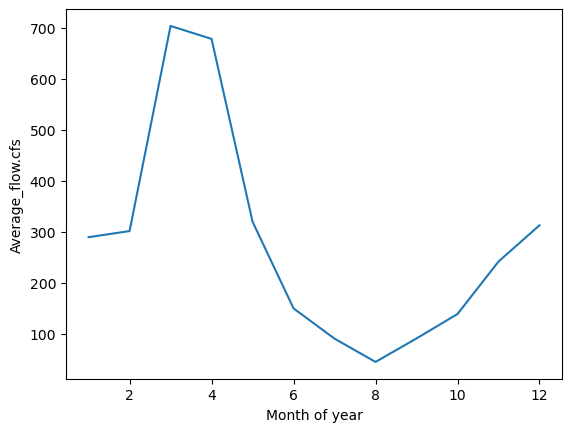

From the hydrograph, the month with the lowest average flow is August


In [2]:
#3
df = pd.read_csv('OwegoCreekFlow.csv')
print(df)

#estimate averages
monthly_average = df.groupby('Month').mean().reset_index()
print(monthly_average)

y = monthly_average['Flow_cfs'].values
x = monthly_average['Month'].values

#3a)
#plot monthly hydrograph
plt.plot(x, y)
plt.ylabel('Average_flow.cfs')
plt.xlabel('Month of year')
plt.show()

#3b)
#determine month with lowest average monthly flow
print('From the hydrograph, the month with the lowest average flow is August')

4.	Create a new variable (‘owego_min_month’) that only contains the data for the design month. This variable should be a vector that has 48 elements, one for each year of the record. 

In [3]:
owego_min_month = df[df["Month"] == 8]
print(owego_min_month)

     Year  Month  Flow_cfs
10   1931      8      21.1
22   1932      8      28.4
34   1933      8     142.8
46   1934      8      16.1
58   1935      8      56.1
70   1936      8      16.7
82   1937      8     148.7
94   1938      8      40.5
106  1939      8      12.5
118  1940      8      32.6
130  1941      8      36.5
142  1942      8      66.3
154  1943      8      28.7
166  1944      8      26.1
178  1945      8      32.4
190  1946      8      67.8
202  1947      8     100.9
214  1948      8      46.8
226  1949      8      15.7
238  1950      8      74.5
250  1951      8      27.7
262  1952      8      30.2
274  1953      8      14.0
286  1954      8      16.1
298  1955      8      39.3
310  1956      8      60.5
322  1957      8      21.8
334  1958      8      43.7
346  1959      8      22.1
358  1960      8      31.5
370  1961      8     139.8
382  1962      8      14.9
394  1963      8      21.5
406  1964      8      12.3
418  1965      8      12.8
430  1966      8      13.0
4

5. **(1 pt)** Now we'll examine owego_min_month.

    **5a) Plot a histogram of the data in owego_min_month. Be sure to label the x-axis.** 

    **5b) Calculate and report the first two moments of the observed data, rounded to two decimal places. Briefly comment on the shape of the distribution, e.g., is it symmetric or skewed?** 
    
    **5c) At this point, which of the following distributions (normal, log-normal, gamma) do you think may be a good fit for these data and why?** 

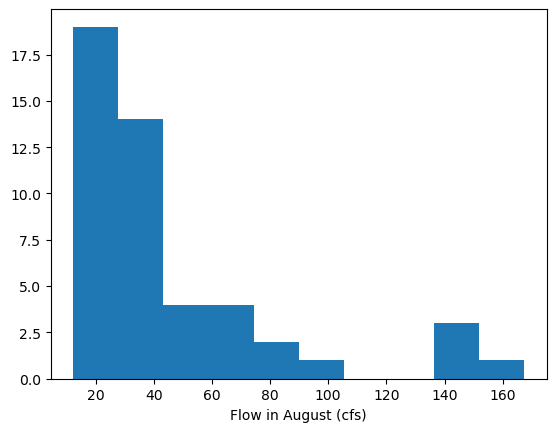

The distribution is right-skewed, and seems exponential
Mean : 44.44, Variance : 1400.15
The distributiuon is right-skewed and hereby both the lognormal and gamma distributions may be a good fits, since it clearly isn't normally distributed due to the lack of symmetry and no negative values. Based on the shape of the histogram and typical hydrologic behaviour, I believe lognormal to have the best fit


In [4]:
#5a
plt.hist(owego_min_month['Flow_cfs'])
plt.xlabel("Flow in August (cfs)")
plt.show()

#5b
print('The distribution is right-skewed, and seems exponential')
mean_flow = np.mean(owego_min_month["Flow_cfs"])
mean_flow_rounded = round(mean_flow, 2)
var_flow = np.var(owego_min_month["Flow_cfs"])
var_flow_rounded = round(var_flow, 2)
print(f"Mean : {mean_flow_rounded}, Variance : {var_flow_rounded}")

#5c 
print("The distributiuon is right-skewed and hereby both the lognormal and gamma distributions may be a good fits, since it clearly isn't normally distributed due to the lack of symmetry and no negative values. Based on the shape of the histogram and typical hydrologic behaviour, I believe lognormal to have the best fit")



6.	**(1 pt)** Fit normal, lognormal, and gamma distributions to these data using maximum likelihood. You can use functions designed for MLE from the scipy.stats package: norm.fit(), lognorm.fit(), gamma.fit(). Note that for the lognormal and gamma distributions, scipy.stats assumes by default a 3-parameter version of these models, allowing for a ‘location’ parameter that shifts the whole distribution to the left or right (i.e., moves the lower bound of the distribution above or below zero). In this application, we are going to force this location parameter equal to zero (i.e., we will use 2-parameter versions of these models). You can do this by setting the argument ‘floc’ equal to 0 in your function call when fitting the models. 

    **6a) Report the fitted parameters and the maximized log-likelihood value for each distribution, all rounded to two decimal places. Which model has the best log-likelihood value?** 

    **6b) Next, re-create the histogram from problem #5, but this time set the argument 'density=True'. Add to this histogram a line representing the pdf of the model with the best log-likelihood value. Briefly comment on the fit of this pdf to the data.**

    -Note: The vertical scale of a 'frequency histogram', which is the default version of a histogram, shows the number of observations in each bin. In contrast, the vertical scale of a 'density histogram' shows units that make the total area of all the bars add to 1 (by taking the frequency of each bar in the histogram and dividing by the product of *n* and *w* (the total number of observations and width of each bar, respectively)). This makes it possible to show the probability density curve of a fitted probability distribution using the same vertical scale. 

    **6c) Finally, for the probability model with the best log-likelihood score selected above, re-fit this model to your data, but this time let the location parameter be fit as well. Add a pdf for this version of the model to the same histogram you created above. Be sure to add a legend to this plot distinguishing which pdf belongs to the 2-parameter and 3-parameter versions of the model.** 
    
    **6d) Does this 3-parameter version of the model look like a better or worse fit to the data than the 2-parameter version? Why might we want to force the location parameter (i.e., the lower bound) of our fitted distribution to zero, rather than let it be fit based on the data? Construct your argument based on the overarching goal of this assignment.**

 

Log-likelihood (Normal): -241.97
Log-likelihood (Lognormal): -220.15
Log-likelihood (Gamma):     -224.36
The model with the best log-likelihood is: Lognormal


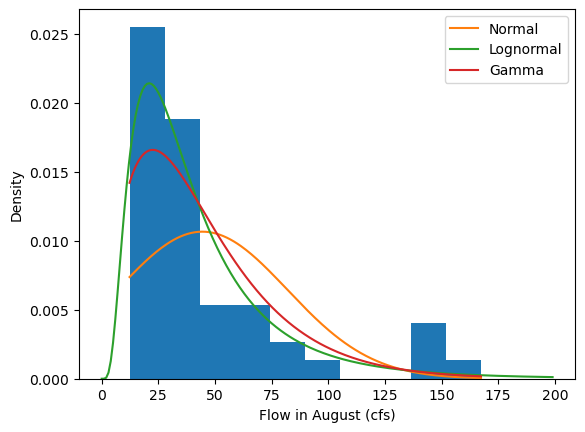

The density histogram shows that the August flows are right-skewed. For this the lognormal curve fits best


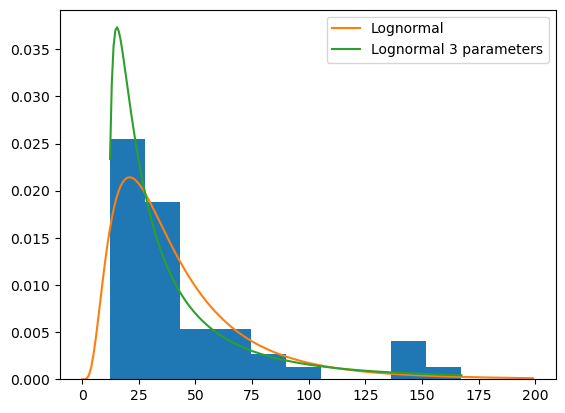

The 3-parameter model looks like a slightly better fit to the histogram, due to the extra location parameter. However, by fixing the lower bound, we ensure our model respects the physical meaning of the variable, and avoids unnecessary complexity. In the context of the assignment, the 2-parameter lognormal is more consistent with the overarching goal of building interpretable models, rather than maximizing fit.


In [5]:
#6a
# Fit normal distribution to the data using MLE, with the respective moments
mu, sigma = norm.fit(owego_min_month["Flow_cfs"])

# Fit log-normal and gamma distributions to the data using MLE, force location (lower bound) to be 0
shape_ln, loc_ln, scale_ln = lognorm.fit(owego_min_month['Flow_cfs'], floc = 0)

shape_gamma, loc_gamma, scale_gamma = gamma.fit(owego_min_month['Flow_cfs'], floc = 0)

# Compute log-likelihoods for each fitted model
ll_normal = np.sum(norm.logpdf(owego_min_month['Flow_cfs'], mu, sigma))
ll_lognorm = np.sum(lognorm.logpdf(owego_min_month['Flow_cfs'], shape_ln, loc_ln, scale_ln))
ll_gamma = np.sum(gamma.logpdf(owego_min_month['Flow_cfs'], shape_gamma, loc_gamma, scale_gamma))

print(f"Log-likelihood (Normal): {ll_normal:.2f}")
print(f"Log-likelihood (Lognormal): {ll_lognorm:.2f}")
print(f"Log-likelihood (Gamma):     {ll_gamma:.2f}")

# Identify the best model

best_ll = max(ll_normal, ll_lognorm, ll_gamma)
if best_ll == ll_normal:
    best_model = "Normal"
elif best_ll == ll_lognorm:
    best_model = "Lognormal"
else:
    best_model = "Gamma"

print(f"The model with the best log-likelihood is: {best_model}")

#6b
plt.hist(owego_min_month['Flow_cfs'], density=True)

# Build x-range
x = np.linspace(owego_min_month['Flow_cfs'].min(), owego_min_month['Flow_cfs'].max(), 200)

# PDFs of each fitted distribution
pdf_norm = norm.pdf(x, mu, sigma)
pdf_lognorm = lognorm.pdf(range(0, 200), shape_ln, loc_ln, scale_ln)
pdf_gamma = gamma.pdf(x, shape_gamma, loc_gamma, scale_gamma)

# Plot
plt.plot(x, pdf_norm, label="Normal")
plt.plot(range(0, 200), pdf_lognorm, label="Lognormal")
plt.plot(x, pdf_gamma, label="Gamma")

plt.xlabel("Flow in August (cfs)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Comment on PDF fit
print("The density histogram shows that the August flows are right-skewed. For this the lognormal curve fits best")

# 6c
shape_ln3, loc_ln3, scale_ln3 = lognorm.fit(owego_min_month['Flow_cfs'])
pdf_lognorm3 = lognorm.pdf(x, shape_ln3, loc_ln3, scale_ln3)

plt.hist(owego_min_month['Flow_cfs'], density=True)
plt.plot(range(0, 200), pdf_lognorm, label="Lognormal")
plt.plot(x, pdf_lognorm3, label="Lognormal 3 parameters")
plt.legend()
plt.show()

# 6d
print(f"The 3-parameter model looks like a slightly better fit to the histogram, due to the extra location parameter. However, by fixing the lower bound, we ensure our model respects the physical meaning of the variable, and avoids unnecessary complexity. In the context of the assignment, the 2-parameter lognormal is more consistent with the overarching goal of building interpretable models, rather than maximizing fit.")

7.	**(1 pt) 7a) Calculate and report the AIC for the three models from problem #6, rounded to two decimal places (only consider the 2-parameter versions of each model here). Using the AIC, select and report the model that best fits the data.** This will be our candidate probability model for these data. 

    **7b) Then, develop a Q-Q plot (with labeled axes) to visually evaluate how well your candidate model fits the data. Use parametric bootstrapping to put 95% confidence bounds on your Q-Q plot, and provide an interpretation of the results.**

The model that best fits the data based on AIC is: Lognorm


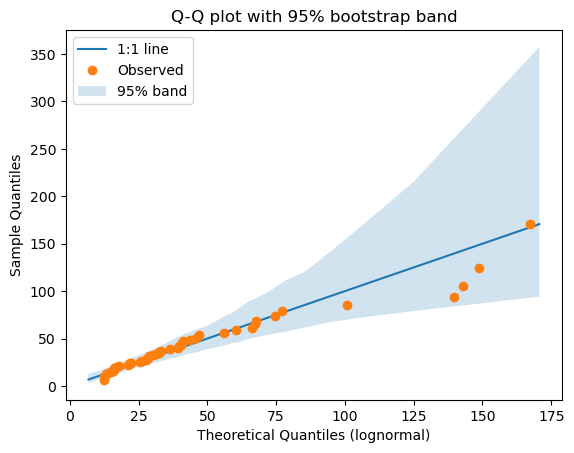

The candidate fits the data well, but becomes less certain at high waterflows


In [6]:
#7a)

# AIC = -2ll + 2k
k = 2
AIC_normal = -2*ll_normal + 2*k
AIC_lognorm = -2*ll_lognorm + 2*k
AIC_gamma = -2*ll_gamma + 2*k

best_AIC = min(AIC_normal, AIC_lognorm, AIC_gamma)
if best_AIC == AIC_normal:
    best_AIC = "Normal"
elif best_AIC == AIC_lognorm:
    best_AIC = "Lognorm"
else:
    best_AIC = "Gamma"

print(f"The model that best fits the data based on AIC is: {best_AIC}")

#7b)

# Develop Q-Q plot
Flow_sorted = np.sort(owego_min_month['Flow_cfs'])
n = len(owego_min_month['Flow_cfs'])
p = (np.arange(1, n+1) - 0.5) / n
Theoretical_quantile = lognorm.ppf(p, shape_ln, loc_ln, scale_ln)

# Parametric bootstrap for 95% CI bands
B = 500
sim_q = np.zeros((B, n))
for b in range(B):
    sim_sample = lognorm.rvs(shape_ln, loc_ln, scale_ln, size=n)
    sim_q[b, :] = np.sort(sim_sample)

lower = np.percentile(sim_q, 2.5, axis=0)
upper = np.percentile(sim_q, 97.5, axis=0)

# Plot
plt.figure()
plt.plot(Theoretical_quantile, Theoretical_quantile, '-', label='1:1 line')
plt.plot(Flow_sorted, Theoretical_quantile, 'o', label='Observed')
plt.fill_between(Theoretical_quantile, lower, upper, alpha=0.2, label='95% band')
plt.xlabel("Theoretical Quantiles (lognormal)")
plt.ylabel("Sample Quantiles")
plt.legend()
plt.title('Q-Q plot with 95% bootstrap band')
plt.show()

print("The candidate fits the data well, but becomes less certain at high waterflows")

8.	**(1 pt) Determine and report the pass-by flow (rounded to two decimal places) at the Owego Creek gaging station in the design month using the TOGS guidance (i.e., use Table 1, copied at end of this assignment) and your fitted distribution of choice.** Note that the drainage area for the Owego gage is 185 square miles. Also be mindful that Table 1 provides you with exceedance probabilities, rather than non-exceedance probabilities. 

In [7]:
#8

# Compute the P70 flow (70% exceedance)
p70_flow = lognorm.ppf(0.30, shape_ln, loc_ln, scale_ln)
print(f"P70 flow:", round(p70_flow, 2))


P70 flow: 23.62


9.	**(1 pt)** Using reasonable estimates of per capita water use in the United States and the population of the town of Owego (Google it; make sure to use the town, not the village, of Owego), determine an estimate of average daily water demand for the town (convert this to cubic feet per second, or cfs). 

    **9a) Report this average daily water demand (rounded to two decimal places), along with the per capita usage and population numbers you used.**  

    **9b) Using your selected probability model, report the probability (as a percentage, rounded to 2 decimal places) that the average flow for the design month will be below this demand level, without consideration of the pass-by flow requirement.** That is, what is the probability that direct withdrawals from the stream will be unable to meet the town’s average water supply needs during the design month? 


In [8]:
#9 

# Estimate average daily water demand for Owego town (cfs)
Owego_pop = 18777
US_daily_perCapita_waterUse = 310

liters_per_day = Owego_pop*US_daily_perCapita_waterUse
m3_per_day = liters_per_day / 1000
ft3_per_day = m3_per_day * 35.3146667
WaterDemand_cfs = ft3_per_day / 86400

#9a)
print(f"By using a population and per capita water usage of: {Owego_pop, US_daily_perCapita_waterUse} respectively, the average daily water demand in cfs has been determined to be: {WaterDemand_cfs:.2f}")

#9b) 
pREQ_flow = lognorm.cdf(WaterDemand_cfs, shape_ln, loc_ln, scale_ln) * 100
print(f"The non-exceedance probability that direct withdrawals from the stream will be unable to meet the town's average water supply needs during the design month is: {pREQ_flow:.2f}", '%')

By using a population and per capita water usage of: (18777, 310) respectively, the average daily water demand in cfs has been determined to be: 2.38
The non-exceedance probability that direct withdrawals from the stream will be unable to meet the town's average water supply needs during the design month is: 0.01 %


10.	**(1 pt)** If the town needs to acquire a DEC permit that first requires them to allow the entire pass-by flow to pass downstream before withdrawing water to meet their domestic supply needs, how does this change the reliability of their water supply in the design month? That is, **report the probability (as a percentage, rounded to 2 decimal places) that the average flow for the design month will be unable to fully meet both the pass-by flow and Owego's municipal demand.** 

In [9]:
#10

# Report the probability that the average flow for the design month will be unable to fully meet both the pass-by flow and Owego's municipal demand.
threshold = WaterDemand_cfs + p70_flow
p_unable = lognorm.cdf(threshold, shape_ln, loc_ln, scale_ln) * 100
print(f"The probability that the average flow for the design month will be unable to fully meet both the pass-by flow and Owego's municipal demand is: {p_unable:.2f}", '%')

The probability that the average flow for the design month will be unable to fully meet both the pass-by flow and Owego's municipal demand is: 34.95 %


11.	**(1 pt) Using a non-parametric bootstrap (with B=1000 bootstrap samples), develop and report 95% confidence intervals (rounded to two decimal places) for both MLE parameter estimates of the distribution you used in problems #8-#10.** 

In [10]:
#11

# Non-parametric bootstrap with 95% confidence intervals
B2 = 1000
shape_bs = np.empty(B2)
scale_bs = np.empty(B2)

for b2 in range(B2):
    sample = np.random.choice(owego_min_month['Flow_cfs'], size=n) # resample with replacement
    shape_b2, loc_b2, scale_b2 = lognorm.fit(sample, floc=0)
    shape_bs[b2] = shape_b2
    scale_bs[b2] = scale_b2

shape_ci = np.percentile(shape_bs, [2.5, 97.5])
scale_ci = np.percentile(scale_bs, [2.5, 97.5])

print("Lognormal (loc=0) parameter CIs (95%):")
print("shape:", round(shape_ci[0], 2), "to", round(shape_ci[1], 2))
print("scale:", round(scale_ci[0], 2), "to", round(scale_ci[1], 2))



Lognormal (loc=0) parameter CIs (95%):
shape: 0.55 to 0.81
scale: 27.72 to 41.54


12.	**(1 pt)** Now we are interested in the uncertainty in your result from problem #10. Using a non-parametric bootstrap (with B=1000 bootstrap samples), simulate from the sampling distribution of the probability (as a percentage) that the average flow for the design month will not be sufficient to meet both pass-by flow requirements and municipal water supply needs. 

    **12a) Plot the sampling distribution for this probability as a boxplot, and add as a red point on top of this boxplot the original probability calculated in problem #10.** 

    **12b) Around how high could the probability reach of not meeting both pass-by flow requirements and municipal water supply needs?**

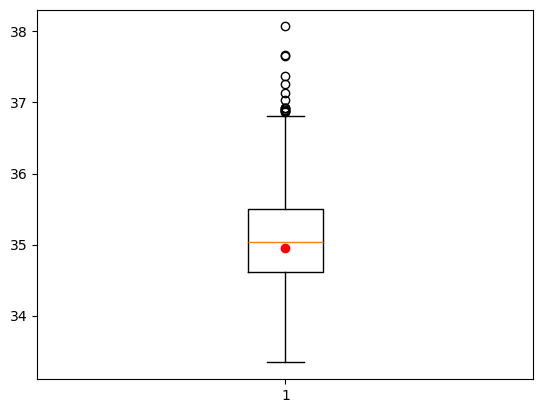

Based on the nonparamteric bootstrap, the probability could reach about 37% at the 97.5th percentil (upper 95% CI), with ouliers running as high as 38%


In [18]:
#12
# Non-parametric bootstrap
B3 = 1000
prob_boot = np.empty(B3)

for b3 in range(B3):
    sample = np.random.choice(owego_min_month['Flow_cfs'], size=n)
    shape_b3, loc_b3, scale_b3 = lognorm.fit(sample, floc=0)
    Threshold_2 = lognorm.ppf(0.30, shape_b3, loc_b3, scale_b3) + WaterDemand_cfs
    prob_boot[b3] = lognorm.cdf(Threshold_2, shape_b3, loc_b3, scale_b3)

# Plot as percentages
prob_boot_pct = 100 * prob_boot

#12a)
plt.figure()
plt.boxplot(prob_boot_pct)
plt.scatter(1, p_unable, c='red')
plt.show()

#12b)
print("Based on the nonparamteric bootstrap, the probability could reach about 37% at the 97.5th percentil (upper 95% CI), with ouliers running as high as 38%")

13.	**(1 pt) In 1-2 sentences, provide an interpretation of your results from both problems #10 and #12 above, with respect to the Town of Owego’s plan to use Owego Creek as the sole source for its domestic water supply.**

In [16]:
print("Using the month with the least flow (August) as our design month, together with having to meet a threshold of around ~ 26cfs, which includes the pass-by and municipial demand required. In question 10 we concluded that the probability the average August flow doesn't meet the threshold requirements is 35%. However, by quantifying this probability's uncertainty, we are able to say that this probability could plausibly be as high as 37% (upper 95% band). Thus relying on Owego Creek alone carries a substantial risk of shortfall in some years.")

Using the month with the least flow (August) as our design month, together with having to meet a threshold of around ~ 26cfs, which includes the pass-by and municipial demand required. In question 10 we concluded that the probability the average August flow doesn't meet the threshold requirements is 35%. However, by quantifying this probability's uncertainty, we are able to say that this probability could plausibly be as high as 37% (upper 95% band). Thus relying on Owego Creek alone carries a substantial risk of shortfall in some years.


In [13]:
print("I used ChatGPT (OpenAI, 2025) in support of my solutions to problems 6, 7, 11, 12 on this assignment.")
print("OpenAI. (2025). ChatGPT (August 28 version) [Large language model]. https://chat.openai.com")

I used ChatGPT (OpenAI, 2025) in support of my solutions to problems 6, 7, 11, 12 on this assignment.
OpenAI. (2025). ChatGPT (August 28 version) [Large language model]. https://chat.openai.com


**Table 1. TOGS guidance for passby flows** 

<img src="TOGS_table.png" width="1000"/>